Author: Yos Ramirez

# True color image, False color image, & Map (Thomas Fire)

## About the notebook

**Link to *my* Homework 4 GitHub repository:**

https://github.com/YoselynR/eds220-hwk4/tree/main

### Purpose
The purpose of this notebook is to visualize the Thomas fire with false color imagery from a previously saved shapefile.

### Highlights
- 
- 
- 
- 
- 

## About the data
In this task you will use one dataset: which includes Santa Barbara County geometries and bands of red, green, blue, near-infrared and shortwave infrared.

### First dataset: Simplified collection of bands

The first dataset contains information a [simplified collection of bands (red, green, blue, near-infrared and shortwave infrared)](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2). 

Microsoft. (n.d.). Landsat Collection 2 Level-2 (C2 L2) data [Data set]. Microsoft Planetary Computer. Retrieved November 23, 2024, from https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2

## True color image

### Import libraries

In [1]:
import os
import rioxarray as rioxr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.plot import show

### File path and import data
File path to the Landsat data using `os` and import using `rioxr.open_rasterio()`.

In [2]:
# Construct the file path
base_dir = '/courses/EDS220/data/hwk4_landsat_data'
landsat = 'landsat8-2018-01-26-sb-simplified.nc'
file_path = os.path.join(base_dir, landsat)

# Open the raster data using rioxr
landsat_data = rioxr.open_rasterio(file_path)

# Print landsat data
print(landsat_data)
print("Current CRS:", landsat_data.rio.crs)
landsat_data = landsat_data.rio.reproject("EPSG:3857")
print("Updated CRS:", landsat_data.rio.crs)

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...
Current CRS: EPSG:32611
Updated CRS: EPSG:3857


### Dataset description
Data exploration and a brief summary of the information I obtained from the preliminary information. Summary includes a description of the data’s variables and dimensions.

The data is geospatial data with x, y, which represent the spatial grid and band. The band variables are red, green, blue, nir08, swir22. Each variable has 5mb of data and are float64 or a number that can be a decimal. The dimensions are 889 for the x longitude, and 757 for the y latitude. The crs is WGS 84 or pseudo mercator. The scale factor is 1.0 not requiring alteration. 

In [3]:
# Print coordinates
print("\nDataset Coordinates:",landsat_data.coords)
# Print variables
print("\nDataset Variables:",landsat_data.variables.keys())
# Print dimensions
print("\nDataset Dimensions:",landsat_data.dims)
# Print band names and values
print("\nBand Names and Values:",landsat_data.data_vars)


Dataset Coordinates: Coordinates:
  * x            (x) float64 7kB -1.349e+07 -1.349e+07 ... -1.32e+07 -1.32e+07
  * y            (y) float64 6kB 4.26e+06 4.26e+06 ... 4.012e+06 4.012e+06
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0

Dataset Variables: KeysView(Frozen({'x': <xarray.IndexVariable 'x' (x: 889)> Size: 7kB
array([-13489902.552051, -13489573.714366, -13489244.87668 , ...,
       -13198552.362737, -13198223.525051, -13197894.687366])
Attributes:
    axis:           X
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate
    units:          metre, 'y': <xarray.IndexVariable 'y' (y: 757)> Size: 6kB
array([4260106.692809, 4259777.855123, 4259449.017438, ..., 4012163.077974,
       4011834.240289, 4011505.402603])
Attributes:
    axis:           Y
    long_name:      y coordinate of projection
    standard_name:  projection_y_coordinate
    units:          metre, 'band': <xarray.IndexVariable 'band' (band: 1)> Size: 8B
arra

### Drop dimension
Dropping the `band` dimension of the data. Using: `squeeze()` and `drop_vars()`.

In [4]:
# Drop single band with squeeze, and drop variables associated with band
landsat_data = landsat_data.squeeze()
landsat_data = landsat_data.drop_vars('band')
# Verify dimensions and coordinates
print(landsat_data.dims, landsat_data.coords)

FrozenMappingWarningOnValuesAccess({'x': 889, 'y': 757}) Coordinates:
  * x            (x) float64 7kB -1.349e+07 -1.349e+07 ... -1.32e+07 -1.32e+07
  * y            (y) float64 6kB 4.26e+06 4.26e+06 ... 4.012e+06 4.012e+06
    spatial_ref  int64 8B 0


## RGB image
No new variables by:

- selecting the red, green, and blue variables (in that order) of the `xarray.Dataset` holding the Landsat data,
- converting to a `numpy.array` using the `to_array()` method, and then
- using `.plot.imshow()` creating an RGB image with the data. Warning is ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


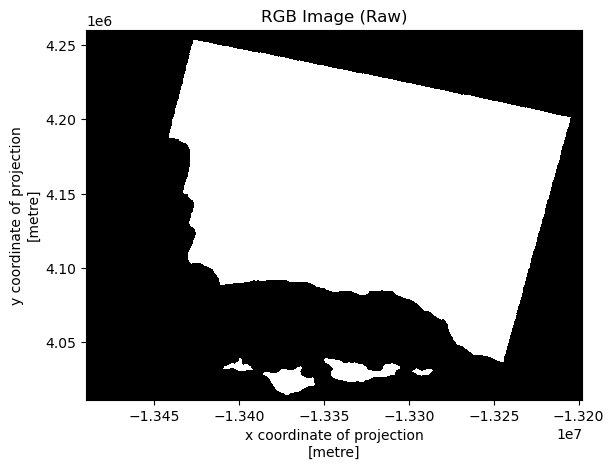

In [6]:
# Plot landsat data as rbg array
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow()
plt.title('RGB Image (Raw)') 
plt.show()

## True color image
Adjusting the scale used for plotting the bands to get a true color image. Using: Robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

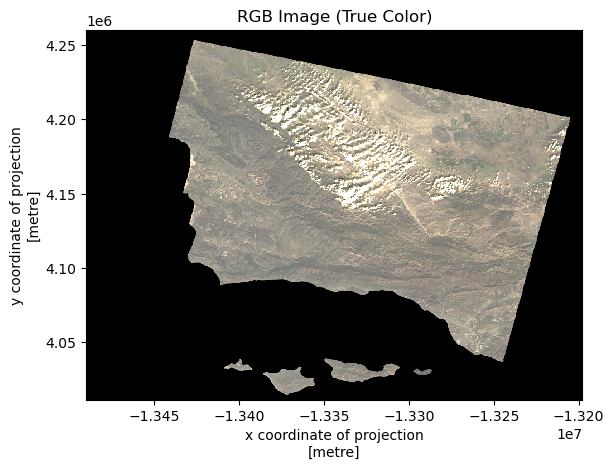

In [7]:
# Plot landsat data as rbg array, include robust true to fix outliers
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)
plt.title('RGB Image (True Color)') 
plt.show()

### Brief explanation
Comparing the ouputs for parts (d) and (e).

The difference between d and e is the robust=True which helps with the clouds that cause rgb to fail to show in the plot. With this operation geopandas fixes the geometries that may be causing a failure.

## False color image
No new variables by: 
- creating a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

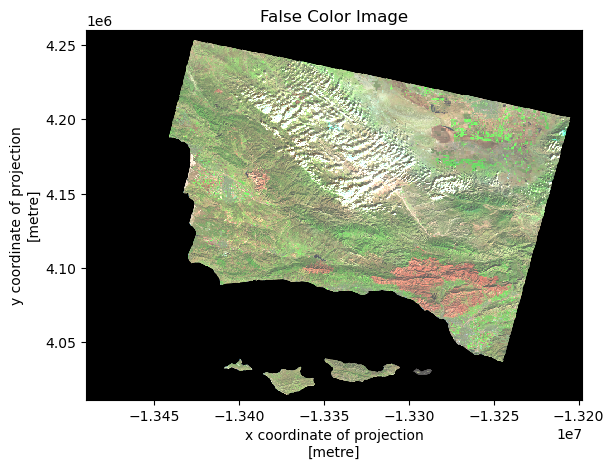

In [16]:
# Plot landsat data as false color image as array, include robust true to fix outliers
landsat_data[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)
plt.title("False Color Image") # Title of plot
plt.show() # Show plot

## Map
Showing the shortwave infrared/near-infrared/red false color image together with the Thomas Fire perimeter. Customized with an informative title and legend.


In [15]:
# Import thomas shape file
fire_shapefile = 'data/Thomas_fire_perimeter.shp' # File path
thomas_fire = gpd.read_file(fire_shapefile) # Read in file with file path
# Make crs the same for both data
thomas_fire = thomas_fire.to_crs(landsat_data.rio.crs)

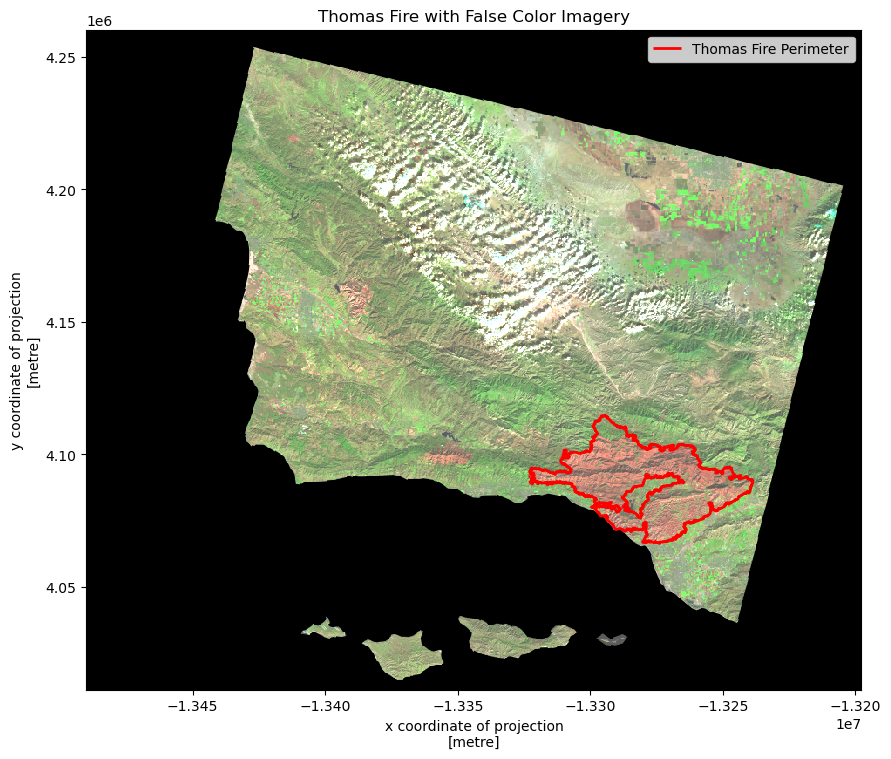

In [17]:
# Plot Thomas fire parimeter with false color imagery
fig, ax = plt.subplots(figsize=(10, 10)) # Figure size
landsat_data[['swir22','nir08','red']].to_array().plot.imshow(robust=True, # Plot false color from landsat data as array
                                                              ax=ax) # Set axis
thomas_fire.boundary.plot(ax=ax, # Set axis
                          edgecolor='red', # Boundary color
                          linewidth=2, # Boundary width
                          label="Thomas Fire Perimeter") # Boundary label
plt.title("Thomas Fire with False Color Imagery") # Title of plot
plt.legend() # Legend
plt.show() # Show plot

### Figure description
Including a brief explanation of how false color imagery is being used.

The figure above shows the area of Santa Barbara county which the Thomas fire occurred in 2017, with a red outline for clarity. The image is in short-wave infrared, near-infrared, and red considered a false color image. The false color image clearly shows the red land compared to the green. Darker red means the area has been burned recently, the lighter red shown above means the area has been burned but not so recent, in 2017. 

#### References

Python Software Foundation. (n.d.). os — Miscellaneous operating system interfaces. In Python Standard Library. Retrieved from https://docs.python.org/3/library/os.html

Knaus, M., & Van der Laan, M. (2020). rioxarray: Geospatial data analysis in Python with xarray and rasterio. Retrieved from https://github.com/corteva/rioxarray

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

Oliphant, T. E. (2006). A guide to NumPy. T.E. Oliphant. Retrieved from https://numpy.org

GeoPandas Development Team. (2024). GeoPandas: Python tools for geographic data. GeoPandas. Retrieved from https://geopandas.org

Gillies, S., & Zambon, M. (2016). Rasterio: A library for reading and writing geospatial raster data. Retrieved from https://rasterio.readthedocs.io

Gillies, S., & Zambon, M. (2016). Rasterio: A library for reading and writing geospatial raster data. Retrieved from https://rasterio.readthedocs.io